In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [3]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

### Draw image

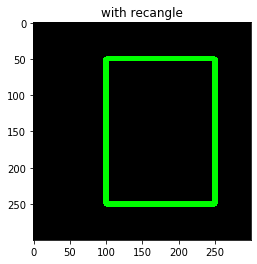

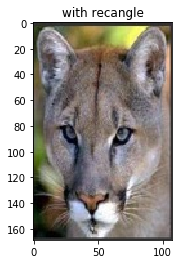

In [4]:
surface = np.zeros((300,300,3), dtype="uint8")
green = (0, 255, 0)
cv2.rectangle(surface, (250,250), (100,50), green, 5)
displayColorImage(surface, "with recangle")

surface = cv2.imread("data/cougarface.jpg")
displayColorImage(surface, "with recangle")


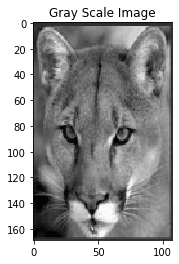

In [5]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(surface, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

### Sobel Kernels

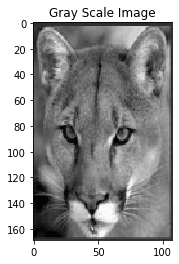

In [6]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(surface, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

In [7]:
displayGrayScaleImage(gX, "Gradient along x-axis")

NameError: name 'gX' is not defined

In [ ]:
displayGrayScaleImage(gY, "Gradient along y-axis")

In [ ]:
displayGrayScaleImage(sobelCombined, "Combined Gradient")

In [ ]:
displayGrayScaleImage(mag, "Combined Gradient")

In [ ]:
displayGrayScaleImage(orientation, "Orientation")

In [ ]:
# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180
print(orientation)

In [ ]:
displayGrayScaleImage(orientation, "Combined Gradient")

In [ ]:
#get center of image
(height, width) = gray.shape[:2]
(centerX, centerY) = (width / 2, height / 2)
 
# rotate our image by 30 degrees in counterclockwise direction, scale by 1.0 
Modified = cv2.getRotationMatrix2D((centerX-10, centerY-10), 110, 1.0)
postRotation = cv2.warpAffine(gray, Modified, (width, height))
displayGrayScaleImage(postRotation, "Rotated by 30 Degrees")
 

In [ ]:
# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(postRotation, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(postRotation, ddepth=cv2.CV_64F, dx=0, dy=1)
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180
print(orientation)

In [ ]:
displayGrayScaleImage(mag, "Combined Gradient")

In [ ]:
displayGrayScaleImage(orientation, "orientation")

In [ ]:
# Read Image 
image = cv2.imread("./data/lena.jpg")
displayColorImage(image, "Original Image")

In [ ]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

In [ ]:
# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

In [ ]:
#normalize gx and gy
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

In [ ]:
displayGrayScaleImage(gX, "X Gradient")

In [ ]:
displayGrayScaleImage(gY, "Y Gradient")

In [ ]:
displayGrayScaleImage(mag, "Sobel Gradient")

In [ ]:
displayGrayScaleImage(orientation, "Combined Gradient")

In [ ]:
# find all pixels that are within the upper and low angle boundaries
idxs = np.where(orientation >= 85, orientation, -1)
idxs = np.where(orientation <= 100 , idxs, -1)
mask = np.zeros(gray.shape, dtype="uint8")
mask[idxs > -1] = 255
displayGrayScaleImage(mask, "masked Gradient")

### Scharr Kernels

In [ ]:
# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
gX = cv2.Scharr(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Scharr(gray, ddepth=cv2.CV_64F, dx=0, dy=1)
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

In [ ]:
displayGrayScaleImage(gX, "X Gradient")

In [ ]:
displayGrayScaleImage(gY, "Y Gradient")

In [ ]:
displayGrayScaleImage(mag, "Scharr")

In [ ]:
displayGrayScaleImage(orientation, "magnitude")

### Canny Kernels

In [ ]:
edges = cv2.Canny(gray, 100, 200, 3, L2gradient=True)
displayGrayScaleImage(mag, "edges with canny")

### Lapacian Filters

In [ ]:

# Apply gaussian blur
blur_img = cv2.GaussianBlur(gray, (3, 3), 0)
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)
displayGrayScaleImage(laplacian, "edges with Laplacian")